In [7]:
import csv
import math

import matplotlib.pyplot as plt
import numpy as np
import scipy

# Versuch 3 Fourieranalyse und Akustik

## Aufgabe 1 Bestimmung der Tonhöhe eines akustischen Signals

### Mehrere Perioden abbilden

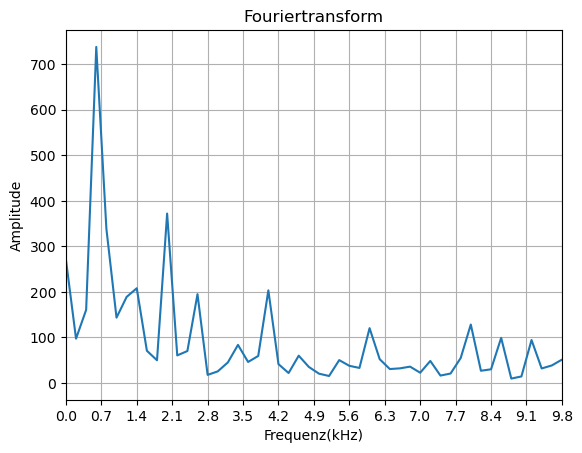

In [8]:
muha_signal_ms = []
muha_signal_mV = []

with open("./data/mikrofon_mundharmonika/mikrofon_mundharmonika_01.csv") as csvfile:
    messung = list(csv.reader(csvfile, delimiter=';'))

    for i in range(3, len(messung)):
        row = messung[i]
        row[0] = float(row[0].replace(",", "."))
        row[1] = float(row[1].replace(",", "."))
        if -20 > row[0] > -25:
            muha_signal_ms.append(row[0])
            muha_signal_mV.append(row[1])

# plt.plot(muha_signal_ms, muha_signal_mV)
# plt.grid()
# plt.show()

fourier = np.fft.fft(muha_signal_mV)

plt.title('Fouriertransform')
plt.ylabel('Amplitude')
plt.xlabel('Frequenz(kHz)')
plt.grid(True)

f = []
for index in range(0, len(fourier), 1):
    f.append(index / (len(fourier) * 0.000_005) / 1000)
f = np.array(f)

plt.xlim(0, len(fourier) / 1000)
# plt.ylim(0, 25_000)
plt.xticks(np.arange(0, 10, 0.7))

plt.plot(f[:len(f) // 2], np.abs(fourier[:len(fourier) // 2]))
plt.savefig('Transformed.png', dpi=900)
plt.show()



### Grundperiode (ms), Grundfrequenz (Hz), Signaldauer (s), Abstandsfrequenz (Hz), Signallänge M, Abstandsintervall (delta t) (s)

## Aufgabe 2 Frequenzen von Lautsprechern

### Übertragen der Daten

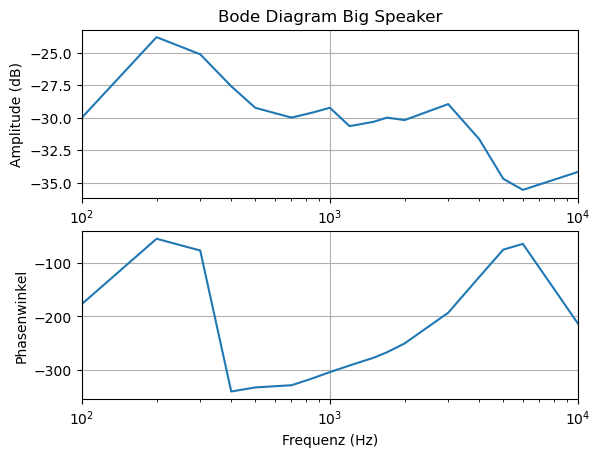

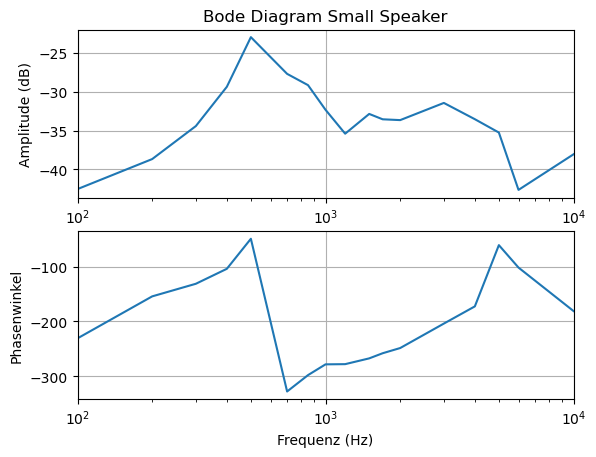

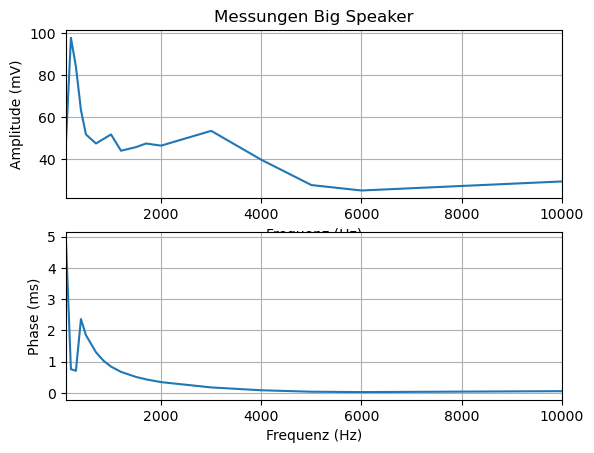

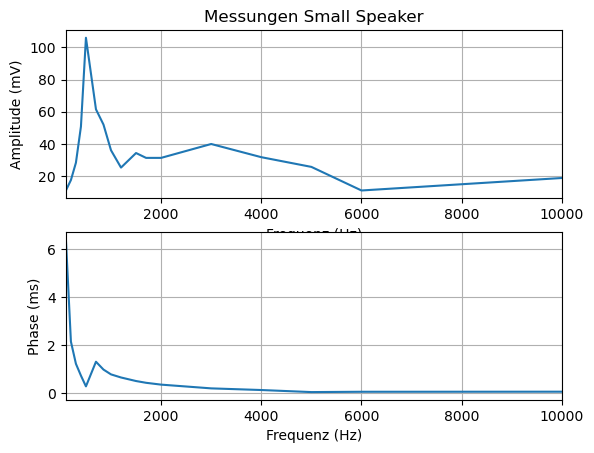

In [13]:
# Frequenz, Amplitude in mV, Phasenverschiebung in ms

bigSpeaker = np.array([[100, 47.32, 4.914, 1.496], [200, 97.66, 0.7616, 1.514], [300, 83.89, 0.711, 1.514], [400, 63.24, 2.365, 1.514],
                       [500, 51.63, 1.85, 1.496], [700, 47.32, 1.305, 1.496], [850, 49.47, 1.033, 1.496], [1000, 51.63, 0.84515, 1.496],
                       [1200, 43.88, 0.6758, 1.496], [1500, 45.6, 0.5138, 1.496], [1700, 47.32, 0.4365, 1.496], [2000, 46.30, 0.3482, 1.496],
                       [3000, 53.34, 0.1789, 1.496], [4000, 39.58, 0.08778, 1.514], [5000, 27.53, 0.04177, 1.496], [6000, 24.95, 0.02981, 1.496],
                       [10000, 29.25, 0.05925, 1.496]])

smallSpeaker = np.array([[100, 11.18, 6.412, 1.496], [200, 17.64, 2.142, 1.514], [300, 28.41, 1.215, 1.496], [400, 50.8, 0.7216, 1.496],
                         [500, 105.9, 0.2725, 1.496], [700, 61.52, 1.301, 1.496], [850, 52.05, 0.9737, 1.496], [1000, 36.14, 0.7731, 1.496],
                         [1200, 25.38, 0.6434, 1.496], [1500, 34.41, 0.4952, 1.514], [1700, 31.40, 0.4216, 1.496], [2000, 31.40, 0.3452, 1.514],
                         [3000, 40.01, 0.1888, 1.496], [4000, 31.83, 0.1198, 1.514], [5000, 25.81, 0.03372, 1.496], [6000, 11.18, 0.04706, 1.514],
                         [10000, 18.93, 0.05028, 1.514]])


def plotBodeDiagramm(speaker, plotTitle, fileName):
    freq = speaker[:, :1]  # * 2 * np.pi
    phase = (speaker[:, 2:3] / -1000) * speaker[:, :1] * 360
    amp = speaker[:, 1:2] / 1000
    ampin = speaker[:, 3:4]
    # Amplitudengang berechnen
    ampdiv = amp / ampin

    plt.figure()
    plt.subplot(211)
    plt.title('Bode Diagram ' + plotTitle)
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Amplitude (dB)')
    plt.semilogx(freq, 20 * np.log10(abs(ampdiv)))
    # plt.xlim(speaker[0,0] * 2 * np.pi, speaker[16,0] * 2 * np.pi)
    plt.xlim(speaker[0, 0], speaker[16, 0])
    plt.grid()

    plt.subplot(212)
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Phasenwinkel')
    plt.semilogx(freq, phase)
    # plt.xlim(speaker[0,0] * 2 * np.pi, speaker[16,0] * 2 * np.pi)
    plt.xlim(speaker[0, 0], speaker[16, 0])
    plt.grid()

    plt.show
    plt.savefig('BodeDiagramm' + fileName + '.png', dpi=900)


def plotReadings(speaker, plotTitle, fileName):
    freq = speaker[:, :1]
    phase = speaker[:, 2:3]
    amp = speaker[:, 1:2]

    plt.figure()
    plt.subplot(211)
    plt.title('Messungen ' + plotTitle)
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Amplitude (mV)')
    plt.plot(freq, amp)
    plt.xlim(speaker[0, 0], speaker[16, 0])
    plt.grid()

    plt.subplot(212)
    plt.xlabel('Frequenz (Hz)')
    plt.ylabel('Phase (ms)')
    plt.plot(freq, phase)
    plt.xlim(speaker[0, 0], speaker[16, 0])
    plt.grid()

    plt.show
    plt.savefig('Messungen' + fileName + '.png', dpi=900)


plotBodeDiagramm(bigSpeaker, "Big Speaker", "BigSpeaker")
plotBodeDiagramm(smallSpeaker, "Small Speaker", "SmallSpeaker")
plotReadings(bigSpeaker, "Big Speaker", "BigSpeaker")
plotReadings(smallSpeaker, "Small Speaker", "SmallSpeaker")